In [1]:
from main import *
from p7_01_functions import *
# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

%matplotlib inline
plt.style.use('fivethirtyeight')
#sns.set()
#pd.options.display.max_columns = 100

In [2]:
# Run once to generat the data / else: load data from the csv

# option 1
#data = main()

# option 2
data = pd.read_csv('main.csv')

In [463]:
data.head()
data.shape
type(data)

,SK_ID_CURR,TARGET,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,CC_NAME_CONTRACT_STATUS_Signed_MAX,CC_NAME_CONTRACT_STATUS_Signed_MEAN,CC_NAME_CONTRACT_STATUS_Signed_SUM,CC_NAME_CONTRACT_STATUS_Signed_VAR,CC_NAME_CONTRACT_STATUS_nan_MIN,CC_NAME_CONTRACT_STATUS_nan_MAX,CC_NAME_CONTRACT_STATUS_nan_MEAN,CC_NAME_CONTRACT_STATUS_nan_SUM,CC_NAME_CONTRACT_STATUS_nan_VAR,CC_COUNT
0,100002,1,0,0,0,0,202500.0,406597.5,24700.5,351000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,1,0,1,0,270000.0,1293502.5,35698.5,1129500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,0,1,0,0,67500.0,135000.0,6750.0,135000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,1,0,0,0,135000.0,312682.5,29686.5,297000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
4,100007,0,0,0,0,0,121500.0,513000.0,21865.5,513000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


(307507, 797)

pandas.core.frame.DataFrame

In [359]:
missing_values = missing_values_table(data.copy())
missing_values

# free memory 
gc.enable()
del missing_values
gc.collect()

Your selected dataframe has 797 columns.
There are 616 columns that have missing values.


,Missing Values,% of Total Missing Values
REFUSED_RATE_DOWN_PAYMENT_MEAN,262339,85.3
REFUSED_RATE_DOWN_PAYMENT_MAX,262339,85.3
REFUSED_RATE_DOWN_PAYMENT_MIN,262339,85.3
REFUSED_AMT_DOWN_PAYMENT_MEAN,262339,85.3
REFUSED_AMT_DOWN_PAYMENT_MAX,262339,85.3
...,...,...
ANNUITY_INCOME_PERC,12,0.0
PAYMENT_RATE,12,0.0
CNT_FAM_MEMBERS,2,0.0
INCOME_PER_PERSON,2,0.0


0

In [516]:
# take some data
data_cut = data.sample(10_000).copy()

In [517]:
data_cut.fillna(0,inplace=True)

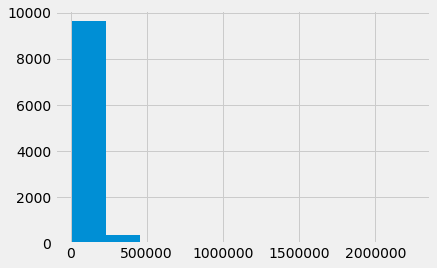

In [518]:
data_cut['INCOME_PER_PERSON'].hist()

In [519]:
# get columns names
column_names = list(data_cut.columns)


def outliers_transformer(df, columns_names):
    for col in columns_names:
        if col != 'TARGET':
            median = df[col].median()
            std = df[col].std()

            df.loc[((df[col] - median).abs() > std) == True, col] = np.nan
            
            df[col].fillna(median, inplace=True)
    return df

In [520]:
data_test = outliers_transformer(data_cut, column_names)

In [489]:
median = data_test['INCOME_PER_PERSON'].median()
std = data_test['INCOME_PER_PERSON'].std()
outliers = (data_test['INCOME_PER_PERSON'] - median).abs() > std
data_test[data_test['INCOME_PER_PERSON']==outliers] = np.nan
data_test['INCOME_PER_PERSON'].fillna(median, inplace=True)

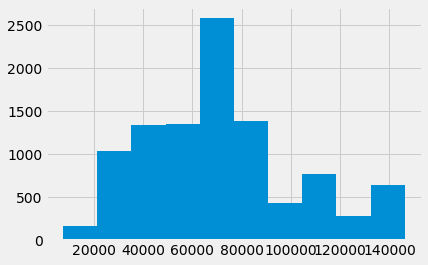

In [521]:
data_test['INCOME_PER_PERSON'].hist()

In [19]:
data_cut.isnull().sum().sort_values(ascending=False)

CC_COUNT                                  0
BURO_MONTHS_BALANCE_SIZE_MEAN             0
BURO_MONTHS_BALANCE_MIN_MIN               0
BURO_CNT_CREDIT_PROLONG_SUM               0
BURO_AMT_ANNUITY_MEAN                     0
                                         ..
PREV_NAME_YIELD_GROUP_XNA_MEAN            0
PREV_NAME_SELLER_INDUSTRY_nan_MEAN        0
PREV_NAME_SELLER_INDUSTRY_XNA_MEAN        0
PREV_NAME_SELLER_INDUSTRY_Tourism_MEAN    0
SK_ID_CURR                                0
Length: 797, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=6,n_estimators=20,n_jobs=-1,)
data_cut = data_cut.astype(float)
X = data_cut.drop(['TARGET','SK_ID_CURR'], axis=1).copy()
y = data_cut['TARGET'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)


# Standardization
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rfc.fit(X_train_scaled, y_train)
print("train score:", rfc.score(X_train_scaled, y_train))
print("test score:", rfc.score(X_test_scaled, y_test))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

train score: 0.926375
test score: 0.929


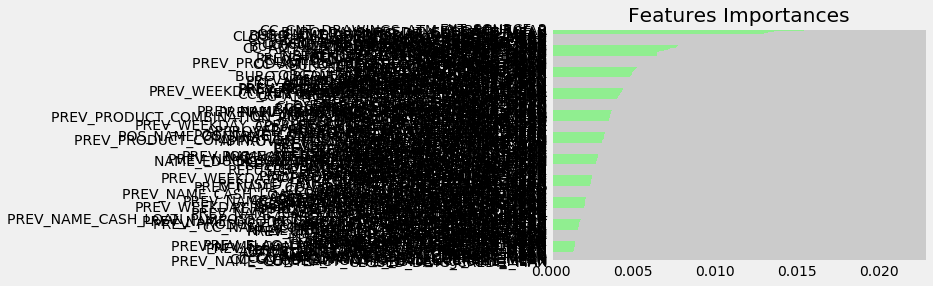

In [21]:
important_features = print_importance_features(rfc, X_train.columns)

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = rfc.predict(X_test_scaled)
confusion_matrix(y_pred, y_test)

NameError: name 'X_test_scaled' is not defined

In [11]:
# from sklearn.model_selection import StratifiedKFold

# X = data.drop(['TARGET','SK_ID_CURR'], axis=1).copy()
# y = data['TARGET'].copy()
# skf = StratifiedKFold(n_splits=2)
# skf.split(X, y)